In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm.auto import tqdm
import pickle
from speculator import *
dtype = tf.float32

columnwidth = 25 # cm
aspect = 1.67
pts_per_inch = 72.27
inch_per_cm = 2.54
width = columnwidth/inch_per_cm
plt.rcParams.update({'figure.figsize': [width, width / aspect],
                                'backend': 'pdf',
                                'font.size': 14,
                                'legend.fontsize': 14,
                                'legend.frameon': False,
                                'legend.loc': 'best',
                                'lines.markersize': 3,
                                'lines.linewidth': 2,
                                'axes.linewidth': .5,
                                'axes.edgecolor': 'black'})

### Load trained model (Prospector-$\alpha$ for three wavelength ranges)

In [14]:
speculator_100_400 = Speculator(restore=True, restore_filename='trained_models/prospector_alpha/100_400/model')
speculator_400_1100 = Speculator(restore=True, restore_filename='trained_models/prospector_alpha/400_1100/model')
speculator_1100_30000 = Speculator(restore=True, restore_filename='trained_models/prospector_alpha/1100_30000/model')

### Try some input parameters

The input parameter vector has the following order:

$\theta = \left[\mathrm{ln}(Z/Z_\odot), \mathrm{ln}(r^1_\mathrm{SFH}), \mathrm{ln}(r^2_\mathrm{SFH}), \mathrm{ln}(r^3_\mathrm{SFH}), \mathrm{ln}(r^4_\mathrm{SFH}), \mathrm{ln}(r^5_\mathrm{SFH}), \mathrm{ln}(r^6_\mathrm{SFH}),\sqrt{\tau_2},n, \tau_1/\tau_2, \mathrm{ln}\,f_\mathrm{AGN}, \mathrm{ln}\,\tau_\mathrm{AGN}, \mathrm{ln}(Z_\mathrm{gas}/Z_\odot), z\right]$

See Table 2 of the Speculator paper for prior limits for each parameter (note that we use the square root of $\tau_2$ in the model but the paper indicates limits for that parameter without the square root). Also, importantly, note that redshift is used to define a lookback time only - all emulated spectra are delivered in the rest frame and for a given lookback time. Therefore, in order to generate a redshifted spectrum you need to apply Equation 2 of the Speculator paper, while passing the desired redshift in the input parameter vector so that the lookback time is set correctly.

Note that all spectra are also delivered for unit stellar mass (ie., normalized to 1 solar mass). Therefore you should add the log mass to the spectrum to obtain a spectrum with a given desired mass. Note the covariant mass-metallicity prior when choosing metalliticities and masses.

In [15]:
# input vector of SPS model parameters
theta = np.array([0, # log metallicity
                 0, 0, 0, 0, 0, 0, # log SFH ratios
                 1.0, # square root of diffuse dust optical depth
                 0, # dust attenuation index
                 1.0, # ratio of birth cloud vs diffuse optical depths
                 0, # fraction of bolometric luminosity from AGN
                 np.log(10), # optical depth of AGN dust taurus
                 0, # log gas phase metallicity
                 1.0 # redshift (used to set lookback time only - see notes above)
                 ])

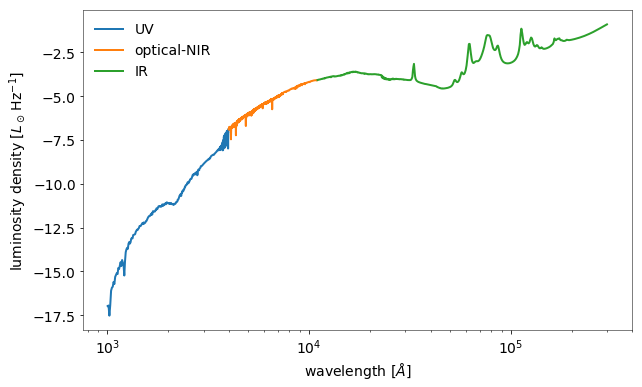

In [17]:
# plot the spectrum
plt.plot(speculator_100_400.wavelengths, speculator_100_400.log_spectrum_(theta), label = 'UV')
plt.plot(speculator_400_1100.wavelengths, speculator_400_1100.log_spectrum_(theta), label='optical-NIR')
plt.plot(speculator_1100_30000.wavelengths, speculator_1100_30000.log_spectrum_(theta), label='IR')
plt.xlabel('wavelength [$\AA$]')
plt.ylabel('luminosity density [$L_\odot\,\mathrm{Hz}^{-1}$]')
plt.xscale('log')
plt.legend()
plt.show()